In [174]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [175]:
d = pd.read_csv('C1.csv', header=None, names=['x','y'])

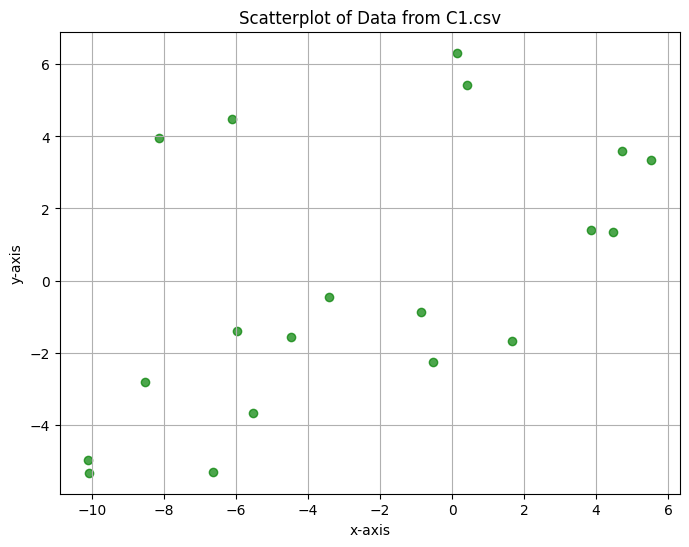

In [176]:
plt.figure(figsize=(8, 6))
plt.scatter(d["x"], d["y"], color='green', alpha=0.7)
plt.title("Scatterplot of Data from C1.csv")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()

In [177]:
# single-link hierarchical clustering
# every point is a cluster
# combine the closest two clusters
#   make a dictionary of ordered pairs : distances
#   for all keys
#      if the paired points are in different clusters
#         merge the clusters
# stop when there are four cluster

clusters = set(zip(d['x'], d['y']))
distances_between_points = {}
for pair1 in clusters:
    for pair2 in clusters:
        if pair1 != pair2 and (pair2, pair1) not in distances_between_points:
            distances_between_points[(pair1, pair2)] = np.linalg.norm(np.array(pair1) - np.array(pair2))

In [178]:
def single_link_merge_clusters(distances_between_points, clusters, first_run):
    max_distance = 0
    for pair, distance in distances_between_points.items():
        if distance > max_distance:
            max_distance = distance
            max_distance_pair = pair
    
    min_distance_so_far = max_distance
    closest_points_so_far = max_distance_pair

    #find the pair of points not in the same cluster that are closest together
    for pair, distance in distances_between_points.items():
        same_cluster = False
        for cluster in clusters:
            if (pair[0] in cluster and pair[1] in cluster):
                same_cluster = True
                break
        if not same_cluster and distance < min_distance_so_far:
            min_distance_so_far = distance
            closest_points_so_far = pair

    if first_run:
        clusters_list = list(clusters)
        clusters_list_of_sets = []
        for i in clusters_list:
            clusters_list_of_sets.append({i})
    else:
        clusters_list_of_sets = clusters
    
    new_clusters = []
    for cluster in clusters_list_of_sets:
        if closest_points_so_far[0] in cluster:
            to_merge1 = cluster
        elif closest_points_so_far[1] in cluster:
            to_merge2 = cluster
        else:
            new_clusters.append(cluster)
    new_clusters.append(to_merge1.union(to_merge2))
    return(new_clusters)

In [179]:
# data must be in a pandas dataframe with x-values in the first column and y-values in the second and the headers 'x' and 'y'
def single_link(data, k):
    first_run = True
    clusters = set(zip(data['x'], data['y']))
    distances_between_points = {}
    for pair1 in clusters:
        for pair2 in clusters:
            if pair1 != pair2:
                distances_between_points[(pair1, pair2)] = np.linalg.norm(np.array(pair1) - np.array(pair2))
    
    num_clust = len(clusters)
    while num_clust != k:
        clusters = single_link_merge_clusters(distances_between_points, clusters, first_run)
        num_clust = len(clusters)
        first_run = False

    return(clusters)

In [180]:
clusters = single_link(d, 4)

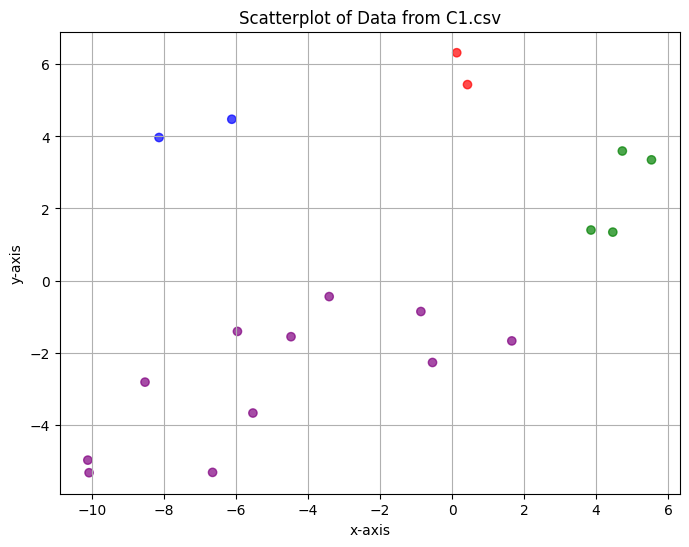

In [181]:
colors = ['red', 'blue', 'green', 'purple']

point_colors = []
x = []
y = []

for cluster_number, cluster in enumerate(clusters):
    for point in cluster:
        x.append(point[0])
        y.append(point[1])
        point_colors.append(colors[cluster_number])

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=point_colors, alpha=0.7)
plt.title("Scatterplot of Data from C1.csv")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()